In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import loaddata
import stimulation
import behaviour
import params

In [10]:
fly_dir = '/mnt/nas2/FH/231220_DNg11xCsChrimson/Fly1'
all_trial_dirs = ['001_t1_p10_intact']
trigger = 'laser_start'
stim_p = [10]
return_var = "v_forw"

In [19]:
# read pickle file in pandas
df = pd.read_pickle(fly_dir + '/' +  all_trial_dirs[0] + '/processed/beh_df.pkl')
stim_sync = pd.read_pickle(fly_dir + '/' +  all_trial_dirs[0] + '/processed/stim_sync.pkl')
stim_paradigm = pd.read_pickle(fly_dir + '/' +  all_trial_dirs[0] + '/processed/stim_paradigm.pkl')

In [4]:
df

t  \
Date   Genotype         Fly TrialName         Trial Frame               
231220 DNg11xCsChrimson 1   001_t1_p10_intact 0     0        7.049867   
                                                    1        7.059867   
                                                    2        7.069867   
                                                    3        7.079867   
                                                    4        7.089867   
...                                                               ...   
                                                    29995  306.827000   
                                                    29996  306.837000   
                                                    29997  306.847000   
                                                    29998  306.857000   
                                                    29999  306.867000   

                                                                abs_t  \
Date   Genotype         Fly TrialName         Trial Frame               
231220 DNg11xCsChrimson 1   001_t1_p10_intact 0     0        7.049867   
                                                    1        7.059867   
                                                    2        7.069867   
                                                    3        7.079867   
                                                    4        7.089867   
...                                                               ...   
                                                    29995  306.827000   
                                                    29996  306.837000   
                                                    29997  306.847000   
                                                    29998  306.857000   
                                                    29999  306.867000   

                                                             twop_index  \
Date   Genotype         Fly TrialName         Trial Frame                 
231220 DNg11xCsChrimson 1   001_t1_p10_intact 0     0     -9.223372e+18   
                                                    1     -9.223372e+18   
                                                    2     -9.223372e+18   
                                                    3     -9.223372e+18   
                                                    4     -9.223372e+18   
...                                                                 ...   
                                                    29995 -9.223372e+18   
                                                    29996 -9.223372e+18   
                                                    29997 -9.223372e+18   
                                                    29998 -9.223372e+18   
                                                    29999 -9.223372e+18   

                                                              v_raw  \
Date   Genotype         Fly TrialName         Trial Frame             
231220 DNg11xCsChrimson 1   001_t1_p10_intact 0     0      0.000000   
                                                    1      0.500000   
                                                    2      0.410973   
                                                    3      0.084366   
                                                    4      0.210692   
...                                                             ...   
                                                    29995  0.438793   
                                                    29996  0.318031   
                                                    29997  0.695656   
                                                    29998  0.160591   
                                                    29999  0.176499   

                                                                 th_raw  \
Date   Genotype         Fly TrialName         Trial Frame                 
231220 DNg11xCsChrimson 1   001_t1_p10_intact 0     0      4.071110e-13   
                                           

In [6]:
df.columns

Index(['t', 'abs_t', 'twop_index', 'v_raw', 'th_raw', 'x', 'y',
       'integrated_forward_movement', 'integrated_side_movement',
       'delta_rot_lab_side', 'delta_rot_lab_forward', 'delta_rot_lab_turn',
       'v', 'th', 'v_forw', 'v_side', 'v_turn', 'anus_x', 'anus_x_rel_neck',
       'anus_y', 'anus_y_rel_neck', 'ovum_x', 'ovum_x_rel_neck', 'ovum_y',
       'ovum_y_rel_neck', 'hrtita_x', 'hrtita_x_rel_neck', 'hrtita_y',
       'hrtita_y_rel_neck', 'mrtita_x', 'mrtita_x_rel_neck', 'mrtita_y',
       'mrtita_y_rel_neck', 'frtita_x', 'frtita_x_rel_neck', 'frtita_y',
       'frtita_y_rel_neck', 'frcofe_x', 'frcofe_x_rel_neck', 'frcofe_y',
       'frcofe_y_rel_neck', 'frfeti_x', 'frfeti_x_rel_neck', 'frfeti_y',
       'frfeti_y_rel_neck', 'stripe4_x', 'stripe4_x_rel_neck', 'stripe4_y',
       'stripe4_y_rel_neck', 'neck_x', 'neck_x_rel_neck', 'neck_y',
       'neck_y_rel_neck', 'frleg_height', 'frtita_neck_dist',
       'frfeti_neck_dist', 'anus_dist', 'ovum_dist', 'ang_frfemur',
     

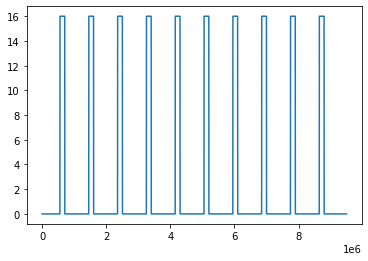

In [18]:
plt.plot(stim_sync['LightSheetLaserOn'])

In [20]:
stim_paradigm

{'t_cam': array([0.00000000e+00, 9.96666667e-03, 1.99666667e-02, ...,
        2.99797100e+02, 2.99807100e+02, 2.99817100e+02]),
 'condition_signals': [array([False, False, False, ..., False, False, False]),
  array([False, False, False, ..., False, False, False]),
  array([False, False, False, ..., False, False, False]),
  array([False, False, False, ..., False, False, False]),
  array([False, False, False, ..., False, False, False]),
  array([False, False, False, ..., False, False, False])],
 'power_signal': array([0., 0., 0., ..., 0., 0., 0.]),
 'start_cam_frames': array([ 1141,  4140,  7140, 10139, 13138, 16137, 19136, 22135, 25135,
        28134]),
 'stop_cam_frames': array([ 1641,  4640,  7639, 10639, 13638, 16637, 19636, 22635, 25635,
        28634]),
 'condition_list': ['zero',
  'zero',
  'zero',
  'zero',
  'zero',
  'zero',
  'zero',
  'zero',
  'zero',
  'zero'],
 'trigger': 'cam'}

In [5]:
plt.plot(df['t'], df['laser_power'])

KeyError: 'laser_power'